Metrics for SGDClassifier:
  Accuracy: 0.7374
  Precision: 0.5350
  Recall: 0.0503
  F1-score: 0.0919


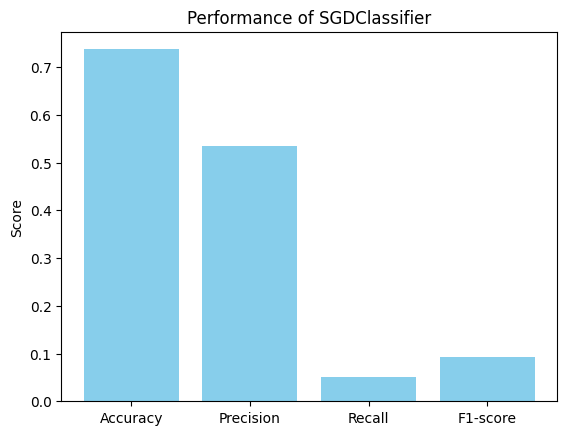

In [ ]:
# SGDClassifier

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

df = pd.read_csv('../september/result/september.csv')

# Преобразование данных из столбца 'text' в массив признаков
array = np.zeros((len(df), 10), dtype=int)
for i in range(len(df)):
    text_value = df.loc[i, 'text']
    if isinstance(text_value, str): 
        text_values = list(map(int, text_value.split()))  
        length = min(len(text_values), 10)  
        array[i, :length] = text_values[:length]

# Создание меток на основе 7-го параметра из 'emotion_scores'
vector_accuracy = [0] * len(df)
for i in range(len(df)):
    text_values = df.loc[i, 'emotion_scores'].strip('[]').split()  
    if text_values:
        first_emotion_score = float(text_values[6]) 
        if first_emotion_score < 0.3:
            vector_accuracy[i] = 0
        else:
            vector_accuracy[i] = 1

X = array  # Признаки
y = vector_accuracy  # Метки

# Разделение выборки на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Инициализация SGDClassifier
clf = SGDClassifier(random_state=42)

# Обучение классификатора
clf.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = clf.predict(X_test)

# Оценка модели
metrics = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1-score': f1_score(y_test, y_pred)
}

# Вывод метрик
print("Metrics for SGDClassifier:")
for metric_name, value in metrics.items():
    print(f"  {metric_name}: {value:.4f}")

# Построение графика важности метрик
plt.bar(metrics.keys(), metrics.values(), color='skyblue')
plt.ylabel('Score')
plt.title('Performance of SGDClassifier')
plt.show()



Metrics for LinearSVC:
  Accuracy: 0.7357
  Precision: 0.0000
  Recall: 0.0000
  F1-score: 0.0000


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


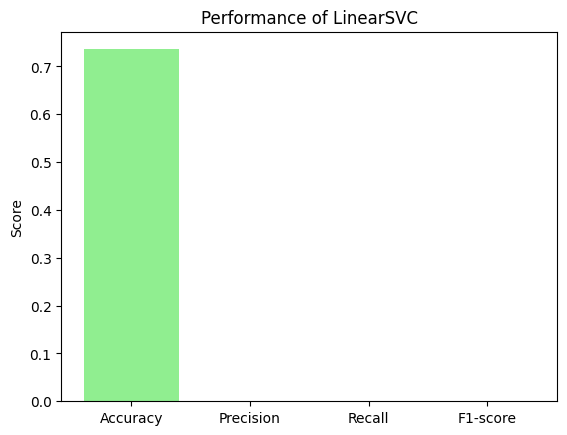

In [ ]:
# LinearSVC

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

df = pd.read_csv('../september/result/september.csv')

array = np.zeros((len(df), 10), dtype=int)
for i in range(len(df)):
    text_value = df.loc[i, 'text']
    if isinstance(text_value, str): 
        text_values = list(map(int, text_value.split()))  
        length = min(len(text_values), 10)  
        array[i, :length] = text_values[:length]

vector_accuracy = [0] * len(df)
for i in range(len(df)):
    text_values = df.loc[i, 'emotion_scores'].strip('[]').split()  
    if text_values:
        first_emotion_score = float(text_values[6]) 
        if first_emotion_score < 0.3:
            vector_accuracy[i] = 0
        else:
            vector_accuracy[i] = 1

X = array 
y = vector_accuracy 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = LinearSVC(random_state=42, max_iter=10000) 

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

metrics = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1-score': f1_score(y_test, y_pred)
}

print("Metrics for LinearSVC:")
for metric_name, value in metrics.items():
    print(f"  {metric_name}: {value:.4f}")

plt.bar(metrics.keys(), metrics.values(), color='lightgreen')
plt.ylabel('Score')
plt.title('Performance of LinearSVC')
plt.show()


[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1999.615253, rho = -0.331351
nSV = 2000, nBSV = 2000
Total nSV = 2000


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Metrics for SVC:
  Accuracy: 0.6528
  Precision: 0.3231
  Recall: 0.2864
  F1-score: 0.3037


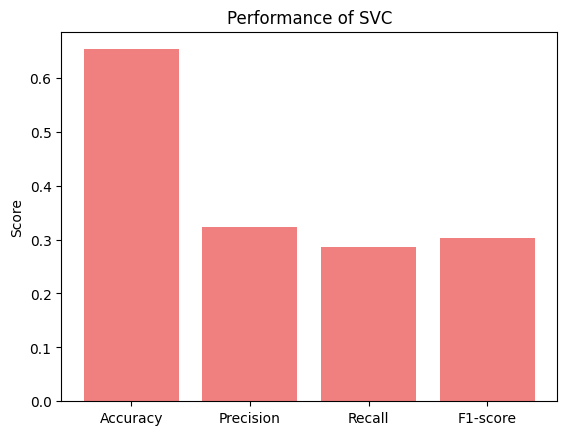

In [ ]:
# SVC

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

df = pd.read_csv('../september/result/september.csv')

array = np.zeros((len(df), 10), dtype=int)
for i in range(len(df)):
    text_value = df.loc[i, 'text']
    if isinstance(text_value, str): 
        text_values = list(map(int, text_value.split()))  
        length = min(len(text_values), 10)  
        array[i, :length] = text_values[:length]

vector_accuracy = [0] * len(df)
for i in range(len(df)):
    text_values = df.loc[i, 'emotion_scores'].strip('[]').split()  
    if text_values:
        first_emotion_score = float(text_values[6]) 
        if first_emotion_score < 0.3:
            vector_accuracy[i] = 0
        else:
            vector_accuracy[i] = 1

X = array 
y = vector_accuracy 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = SVC(random_state=42, max_iter=1000, verbose=True)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

metrics = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1-score': f1_score(y_test, y_pred)
}

print("Metrics for SVC:")
for metric_name, value in metrics.items():
    print(f"  {metric_name}: {value:.4f}")

plt.bar(metrics.keys(), metrics.values(), color='lightcoral')
plt.ylabel('Score')
plt.title('Performance of SVC')
plt.show()


[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 100
C = 0.000000
obj = 0.000000, rho = 19.045244
nSV = 33132, nBSV = 33130
Total nSV = 33132


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Metrics for NuSVC:
  Accuracy: 0.4481
  Precision: 0.2846
  Recall: 0.7190
  F1-score: 0.4078


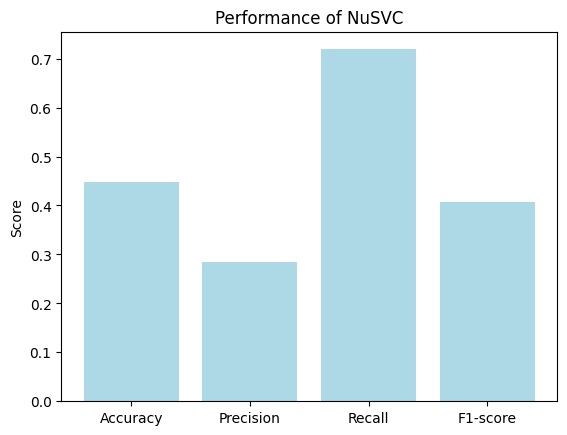

In [ ]:
# NuSVC
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import NuSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

df = pd.read_csv('../september/result/september.csv')

array = np.zeros((len(df), 10), dtype=int)
for i in range(len(df)):
    text_value = df.loc[i, 'text']
    if isinstance(text_value, str): 
        text_values = list(map(int, text_value.split()))  
        length = min(len(text_values), 10)  
        array[i, :length] = text_values[:length]

vector_accuracy = [0] * len(df)
for i in range(len(df)):
    text_values = df.loc[i, 'emotion_scores'].strip('[]').split()  
    if text_values:
        first_emotion_score = float(text_values[6]) 
        if first_emotion_score < 0.3:
            vector_accuracy[i] = 0
        else:
            vector_accuracy[i] = 1

X = array 
y = vector_accuracy 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = NuSVC(nu=0.1, kernel='linear', max_iter=100, random_state=42, verbose=True)


clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

metrics = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1-score': f1_score(y_test, y_pred)
}

print("Metrics for NuSVC:")
for metric_name, value in metrics.items():
    print(f"  {metric_name}: {value:.4f}")

plt.bar(metrics.keys(), metrics.values(), color='lightblue')
plt.ylabel('Score')
plt.title('Performance of NuSVC')
plt.show()


Metrics for KNeighborsClassifier:
  Accuracy: 0.7587
  Precision: 0.5609
  Recall: 0.4017
  F1-score: 0.4681


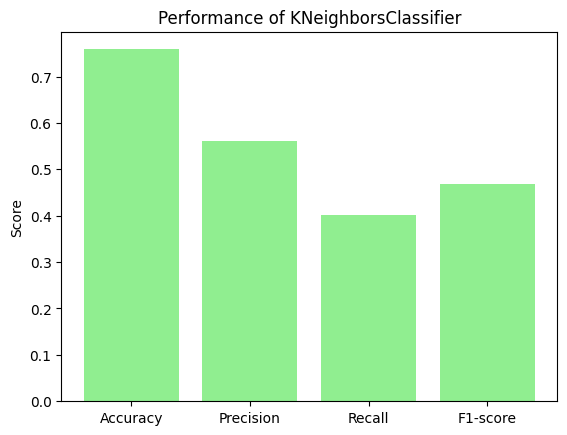

In [ ]:
# KNeighborsClassifier

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

df = pd.read_csv('../september/result/september.csv')

array = np.zeros((len(df), 10), dtype=int)
for i in range(len(df)):
    text_value = df.loc[i, 'text']
    if isinstance(text_value, str): 
        text_values = list(map(int, text_value.split()))  
        length = min(len(text_values), 10)  
        array[i, :length] = text_values[:length]

vector_accuracy = [0] * len(df)
for i in range(len(df)):
    text_values = df.loc[i, 'emotion_scores'].strip('[]').split()  
    if text_values:
        first_emotion_score = float(text_values[6]) 
        if first_emotion_score < 0.3:
            vector_accuracy[i] = 0
        else:
            vector_accuracy[i] = 1

X = array 
y = vector_accuracy 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = KNeighborsClassifier(n_neighbors=5) 

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

metrics = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1-score': f1_score(y_test, y_pred)
}

print("Metrics for KNeighborsClassifier:")
for metric_name, value in metrics.items():
    print(f"  {metric_name}: {value:.4f}")

plt.bar(metrics.keys(), metrics.values(), color='lightgreen')
plt.ylabel('Score')
plt.title('Performance of KNeighborsClassifier')
plt.show()


Metrics for GaussianNB:
  Accuracy: 0.6911
  Precision: 0.3781
  Recall: 0.2620
  F1-score: 0.3095


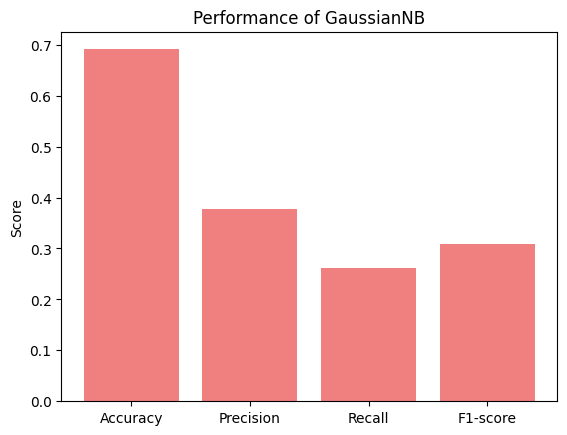

In [ ]:
# GaussianNB

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

df = pd.read_csv('../september/result/september.csv')

array = np.zeros((len(df), 10), dtype=int)
for i in range(len(df)):
    text_value = df.loc[i, 'text']
    if isinstance(text_value, str): 
        text_values = list(map(int, text_value.split()))  
        length = min(len(text_values), 10)  
        array[i, :length] = text_values[:length]

vector_accuracy = [0] * len(df)
for i in range(len(df)):
    text_values = df.loc[i, 'emotion_scores'].strip('[]').split()  
    if text_values:
        first_emotion_score = float(text_values[6]) 
        if first_emotion_score < 0.3:
            vector_accuracy[i] = 0
        else:
            vector_accuracy[i] = 1

X = array 
y = vector_accuracy 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = GaussianNB()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

metrics = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1-score': f1_score(y_test, y_pred)
}

print("Metrics for GaussianNB:")
for metric_name, value in metrics.items():
    print(f"  {metric_name}: {value:.4f}")

plt.bar(metrics.keys(), metrics.values(), color='lightcoral')
plt.ylabel('Score')
plt.title('Performance of GaussianNB')
plt.show()



Metrics for DecisionTreeClassifier:
  Accuracy: 0.7172
  Precision: 0.4662
  Recall: 0.4816
  F1-score: 0.4738


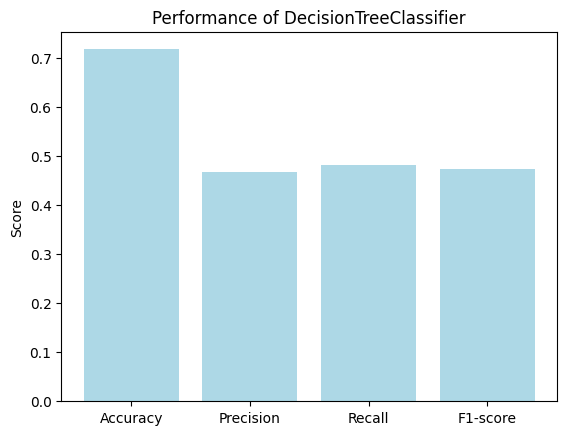

In [ ]:
# DecisionTreeClassifier

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

df = pd.read_csv('../september/result/september.csv')

array = np.zeros((len(df), 10), dtype=int)
for i in range(len(df)):
    text_value = df.loc[i, 'text']
    if isinstance(text_value, str): 
        text_values = list(map(int, text_value.split()))  
        length = min(len(text_values), 10)  
        array[i, :length] = text_values[:length]

vector_accuracy = [0] * len(df)
for i in range(len(df)):
    text_values = df.loc[i, 'emotion_scores'].strip('[]').split()  
    if text_values:
        first_emotion_score = float(text_values[6]) 
        if first_emotion_score < 0.3:
            vector_accuracy[i] = 0
        else:
            vector_accuracy[i] = 1

X = array 
y = vector_accuracy 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

metrics = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1-score': f1_score(y_test, y_pred)
}

print("Metrics for DecisionTreeClassifier:")
for metric_name, value in metrics.items():
    print(f"  {metric_name}: {value:.4f}")

plt.bar(metrics.keys(), metrics.values(), color='lightblue')
plt.ylabel('Score')
plt.title('Performance of DecisionTreeClassifier')
plt.show()



Test metrics: Accuracy=0.7363, Precision=0.3333, Recall=0.0001, Fscore=0.0003
Validation metrics: Accuracy=0.7363, Precision=0.6000, Recall=0.0004, Fscore=0.0008


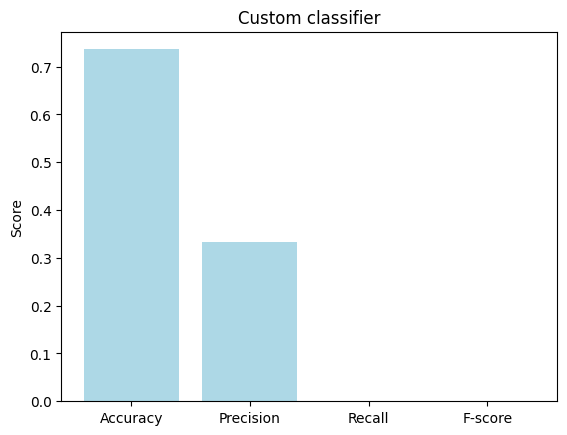

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def split_train_test(X, y, test_size=0.2):
    return train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)

def split_train_test_val(X, y, test_size=0.2, val_size=0.2):
    X_train, X_temp, y_train, y_temp = train_test_split(
        X, y, test_size=test_size + val_size, random_state=42, stratify=y
    )
    val_size_adjusted = val_size / (test_size + val_size)
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, test_size=1 - val_size_adjusted, random_state=42, stratify=y_temp
    )
    return X_train, X_val, X_test, y_train, y_val, y_test

def sigmoid(x):
    x = np.clip(x, -500, 500)
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(sigmoid_value):
    return sigmoid_value * (1 - sigmoid_value)

def train_model(X_train, y_train, epochs=100, learning_rate=0.1):
    vector_w = np.random.uniform(-0.01, 0.01, X_train.shape[1]) 
    bias = 1.0
    results = []

    for epoch in range(epochs):
        labels = []
        for i in range(len(X_train)):
            temp = np.dot(X_train[i], vector_w) + bias
            predicted_output = sigmoid(temp)
            predicted_label = 1 if predicted_output >= 0.5 else 0
            labels.append(predicted_label)

        
            error = y_train[i] - predicted_output
            gradient = error * sigmoid_derivative(predicted_output)
            vector_w += learning_rate * gradient * X_train[i]

    
        accuracy = accuracy_score(y_train, labels)
        precision = precision_score(y_train, labels)
        recall = recall_score(y_train, labels)
        Fscore = f1_score(y_train, labels)

        results.append({
            'Epoch': epoch,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'Fscore': Fscore
        })

    return vector_w, results

def calculate_metrics(X, y, vector_w, bias=1.0):
    labels = []
    for nums in X:
        temp = np.dot(nums, vector_w) + bias
        predicted_label = 1 if sigmoid(temp) >= 0.5 else 0
        labels.append(predicted_label)

    accuracy = accuracy_score(y, labels)
    precision = precision_score(y, labels)
    recall = recall_score(y, labels)
    Fscore = f1_score(y, labels)
    return accuracy, precision, recall, Fscore

def plot_final_metrics(accuracy, precision, recall, Fscore):
    metrics = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F-score': Fscore,
    }


    plt.bar(metrics.keys(), metrics.values(), color='lightblue')
    plt.ylabel('Score')
    plt.title('Custom classifier')
    plt.show()

df = pd.read_csv('../september/result/september.csv')

array = np.zeros((len(df), 10), dtype=int)
for i in range(len(df)):
    text_value = df.loc[i, 'text']
    if isinstance(text_value, str):
        try:
            text_values = list(map(int, text_value.split()))
            length = min(len(text_values), 10)
            array[i, :length] = text_values[:length]
        except ValueError:
            continue

vector_accuracy = []
for i in range(len(df)):
    try:
        text_values = df.loc[i, 'emotion_scores'].strip('[]').split()
        if text_values:
            first_emotion_score = float(text_values[6])
            vector_accuracy.append(1 if first_emotion_score >= 0.3 else 0)
    except (ValueError, AttributeError):
        vector_accuracy.append(0)

X = array 
y = np.array(vector_accuracy) 

X_train, X_val, X_test, y_train, y_val, y_test = split_train_test_val(X, y)

vector_w, results = train_model(X_train, y_train, epochs=100, learning_rate=0.1)

accuracy_test, precision_test, recall_test, Fscore_test = calculate_metrics(X_test, y_test, vector_w)
print(f'Test metrics: Accuracy={accuracy_test:.4f}, Precision={precision_test:.4f}, Recall={recall_test:.4f}, Fscore={Fscore_test:.4f}')

accuracy_val, precision_val, recall_val, Fscore_val = calculate_metrics(X_val, y_val, vector_w)
print(f'Validation metrics: Accuracy={accuracy_val:.4f}, Precision={precision_val:.4f}, Recall={recall_val:.4f}, Fscore={Fscore_val:.4f}')

results_df = pd.DataFrame(results)
results_df.to_csv('training_results.csv', index=False)

plot_final_metrics(accuracy_test, precision_test, recall_test, Fscore_test)
